# Employee Attrition Project

- This project is a kaggel competition and a project completed in my AI2 class at Boston College. for more information on the data set and the competition can be found here https://www.kaggle.com/competitions/playground-series-s3e3/overview
- Here are some quick links to some of the packages used in this project:
[sklearn](https://scikit-learn.org/stable/),  [tensorflow](https://www.tensorflow.org/) ,  [numpy](https://numpy.org/) ,  [pandas](https://pandas.pydata.org/docs/index.html) , [seaborn](https://seaborn.pydata.org/) ,  [matplotlib](https://matplotlib.org/)

## Business Question and Project Motivation:




**Problem Statement:**
>Employee attrition is a critical concern for businesses, as it can lead to increased recruitment costs, loss of valuable talent, and disruptions in operations. The business question addressed in this project is, "How can we predict and understand employee attrition in our organization?"

**Motivation**
>The motivation behind this project stems from the significance of employee retention and its impact on a company's overall performance. High attrition rates can be detrimental to both productivity and profitability. By using a HR analytics dataset that captures employee data, this project aims to develop a predictive model to anticipate employee attrition and identify factors influencing this phenomenon.

**Key Objectives:**

**Attrition Prediction:**
>Develop a neural network model to predict employee attrition based on historical data and features such as job role, salary, work environment, and job satisfaction.

**Risk Mitigation:**
>By understanding the factors contributing to attrition, the project seeks to provide actionable insights to mitigate the risk of losing valuable employees.

**Talent Retention:**
>The project aims to help organizations make informed decisions to improve employee satisfaction and retention, ultimately contributing to a more stable and productive workforce.

**Model Evaluation**
>Evaluate the performance of the neural network model and provide a reliable tool for HR professionals to make data-driven decisions in managing employee attrition.

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

## - Work Space Preperation:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import tensorflow as tf
from tensorflow.keras import layers

import sklearn
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import scipy.stats as stats

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
# Configure matplotlib
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
#Set seed for reproducibly
np.random.seed(1)

## - Upload The Data:

In [ ]:
# Mount my google drive so that data can be acessed
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# test line to help find file path
!ls "/content/gdrive/My Drive/Emp_att"

'EmployeeAttrition_CheckPoint10 17.ipynb'   EmployeeAttrition.ipynb   test.csv	 train.csv


In [ ]:
# upload data from google drive
train_data=pd.read_csv("/content/gdrive/My Drive/Emp_att/train.csv")
test_data=pd.read_csv("/content/gdrive/My Drive/Emp_att/test.csv")

In [ ]:
# Check for missing values and column data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


## - Data Visualization and exploration


In [ ]:
train_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


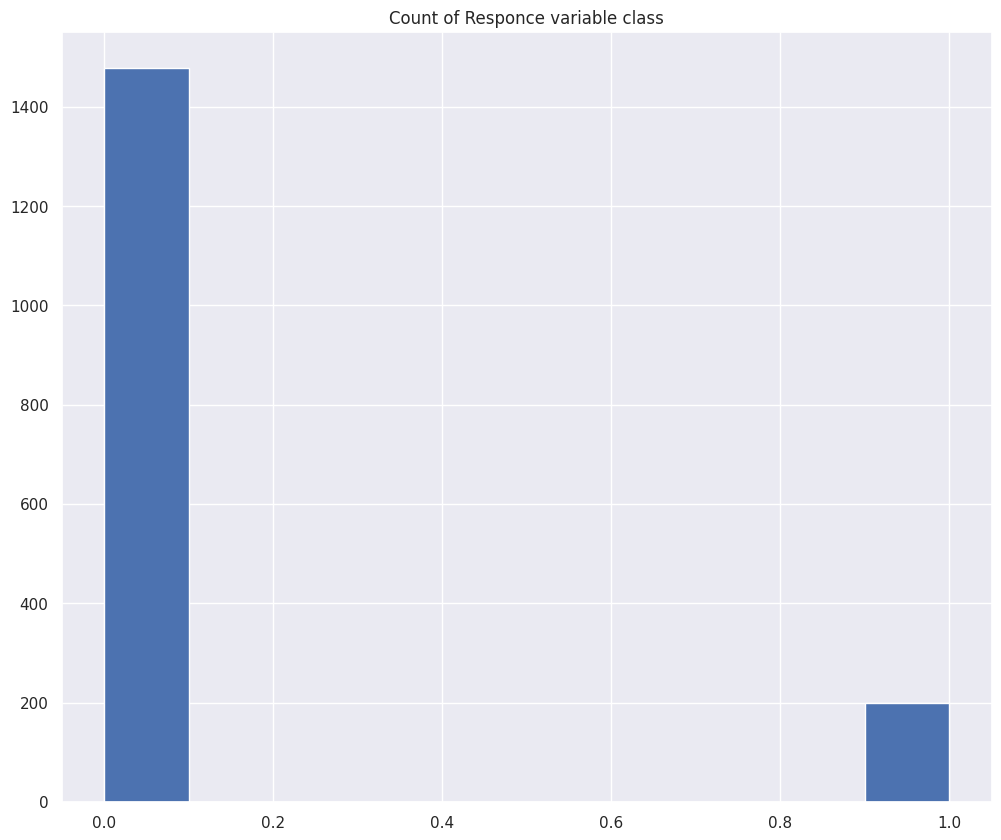

In [ ]:
plt.hist(train_data["Attrition"])
plt.title("Count of Responce variable class")
plt.show()

In [ ]:
#show an actual count and % of the responce variable class
neg, pos = np.bincount(train_data['Attrition'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1677
    Positive: 200 (11.93% of total)



**Takeaways**
- The data is very unbalanced, only 11.93% of the data set is those who leave the company. We will need to account for that in the training and the model

In [ ]:
#num_inputs = {name:input for name,input in inputs.items()
                  #if input.dtype==tf.float32}

fig = plt.figure(figsize=(26,26), dpi = 480)
df = train_data
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.title("Correlation Heat map")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Takeaways**
- Relativly strong negative correlation between `Attrition` and `Age`, `Education`, `EmploymentSatisfaction`, `JobLevel`, `MonthlyIncome`, `RelationshipSatisfaction`, `StockOptionLevel`, `Totalworkingyears`, `Yearsatcompany`, `YearsInCurrentRole`, `YearswithCurrentManager` and `JobInvolvement`.

- Small positive correlation between `Attrition` and `DistanceFromHome`, `NumberOfCompaniesWorked` , and `PreformaceRaitong`

- There is high corelation betweeen `YearsatCurrentPostion`,`YearsATCompany`, `YearsWithCurrentManager`, and `YearsSinceLastPromotion`. We need to investigate further by creating a VIF plot and keep in mind while training. Also these variables are sightly diffrent but hold a lot of the same information.

- There are no Features in this data set that are strongly correlated with Attrition. There seems to indicate that indivduals make attrition dections based on a number of factors and generally there is no sigle factor from this firm that pushes people to leave.



In [ ]:
# Binary correaltion test for significance
point_biserial_corr, p_value = stats.pointbiserialr(train_data["Attrition"], train_data["MonthlyIncome"])

number = p_value
formatted_number = f'{number:.15f}'  # Replace 15 with the desired number of decimal places

print("Point-biserial correlation:", point_biserial_corr)
print("P-value:", formatted_number)


Point-biserial correlation: -0.126896414397929
P-value: 0.000000185036936


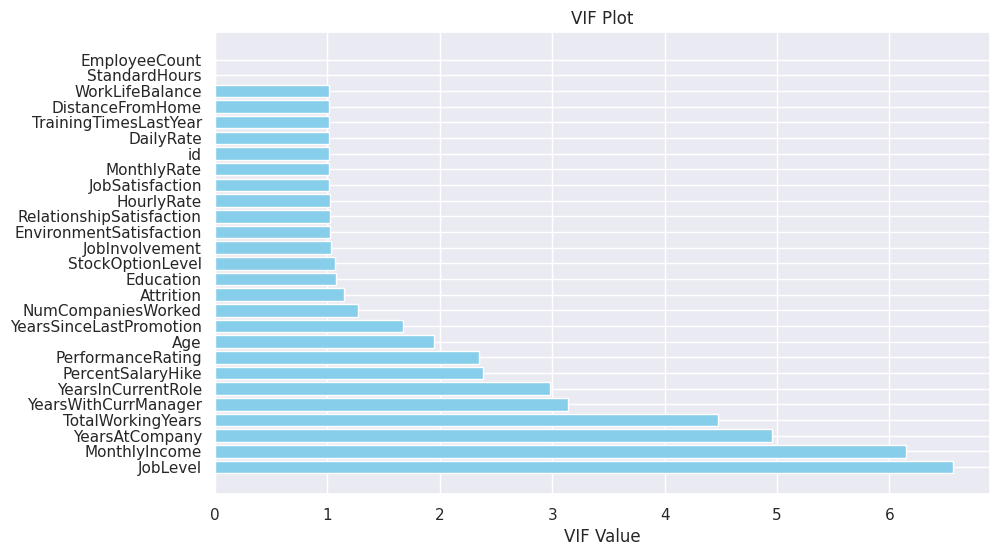

In [ ]:
# Create a DataFrame to store VIF values

vifdf = df.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["Variable"] = vifdf.columns
vif_data["VIF"] = [variance_inflation_factor(vifdf.values, i) for i in range(vifdf.shape[1])]

# Sort the DataFrame by VIF values (optional)
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Create the VIF plot
plt.figure(figsize=(10, 6))
plt.barh(vif_data["Variable"], vif_data["VIF"], color='skyblue')
plt.xlabel('VIF Value')
plt.title('VIF Plot')
plt.show()

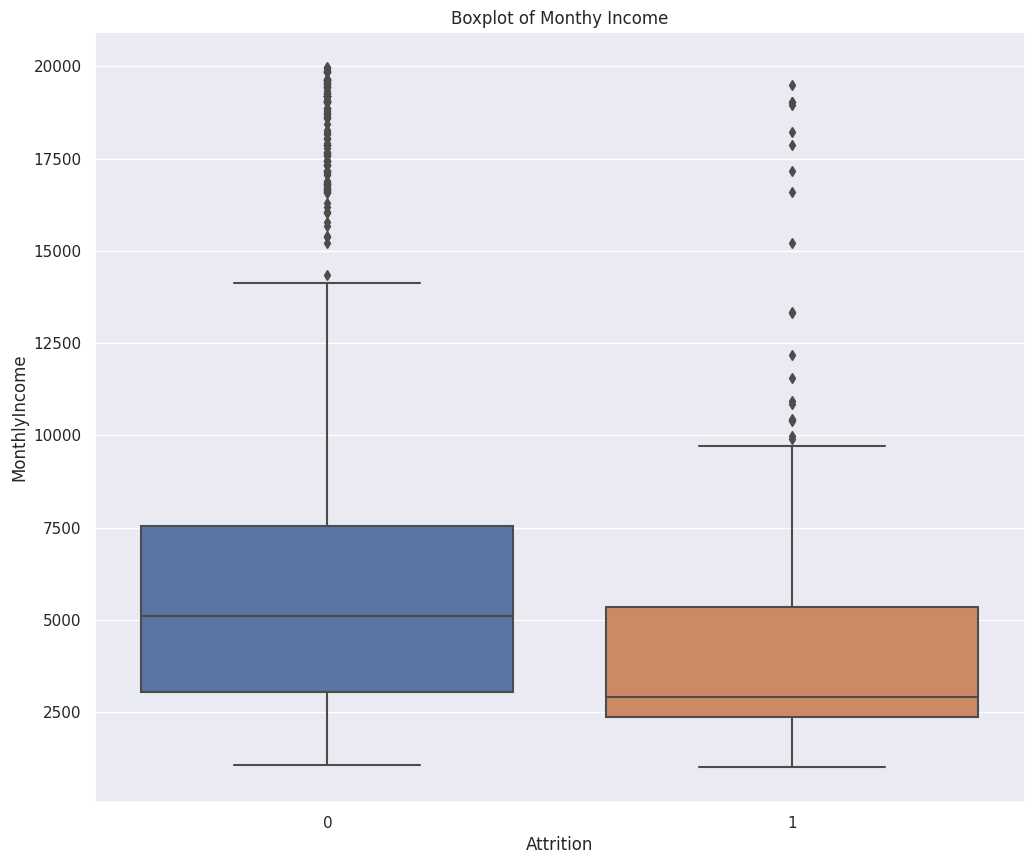

In [ ]:


sns.boxplot(data=df, x=df['Attrition'],  y=df['MonthlyIncome'])
plt.title('Boxplot of Monthy Income')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()

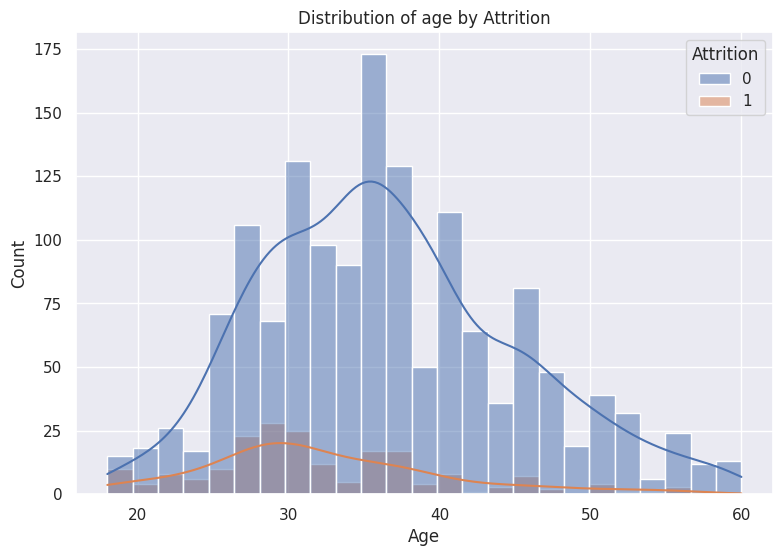

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "Age",
             data=df,
              bins=25,
              hue="Attrition",
              kde=True)
plt.title('Distribution of age by Attrition')
plt.show()

In [ ]:
# doing a small bit of preprocessing here because the data must be normalized for the postive and negative
# distribution plots. The actual data preprocessing is a part of the model so its a little bit easier to make
# a copy of the data for plotting purposes

# Form np arrays of labels and features.
plot_train_data = train_data.copy()
plot_labels = np.array(plot_train_data.pop('Attrition'))
bool_train_labels = plot_labels != 0

#only select numeric data
numerics = ['int64']
plot_df = df.select_dtypes(include=numerics)

#scale numeric data

pos_df = pd.DataFrame(plot_df[ bool_train_labels], columns=plot_df.columns)
neg_df = pd.DataFrame(plot_df[~bool_train_labels], columns=plot_df.columns)

#create plotting data thats normalized
scaler = StandardScaler()
pos_plot = pd.DataFrame(scaler.fit_transform(pos_df), columns=plot_df.columns)
neg_plot = pd.DataFrame(scaler.fit_transform(neg_df), columns=plot_df.columns)

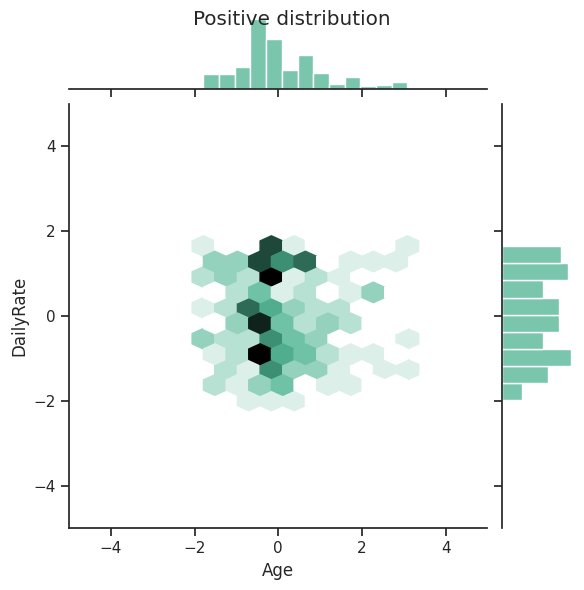

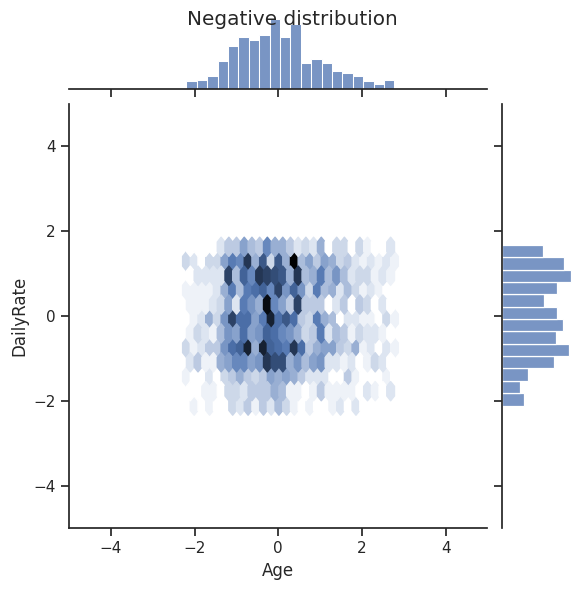

In [ ]:
sns.set_theme(style="ticks")

sns.jointplot(x=pos_plot["Age"], y=pos_plot["DailyRate"],
              kind='hex', xlim=(-5,5), ylim=(-5,5),
              color="#4CB391")
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_plot["Age"], y=neg_plot["DailyRate"],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

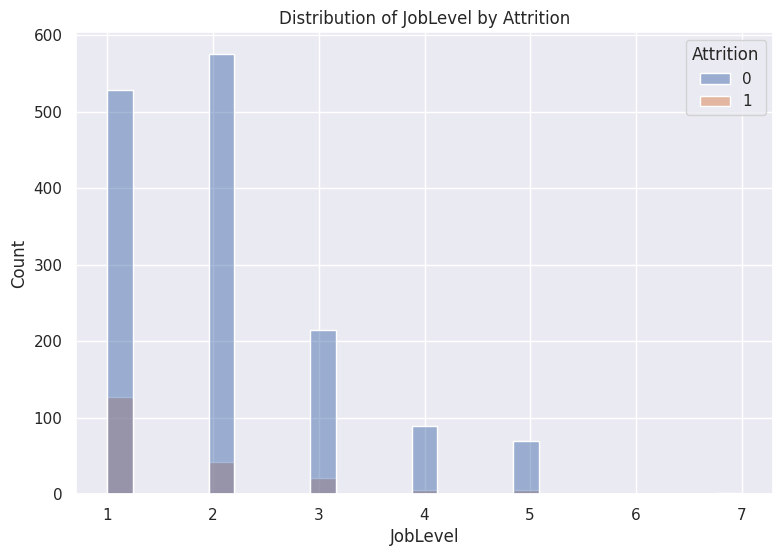

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "JobLevel",
             data=train_data,
              bins=25,
              hue="Attrition",
              kde=False)
plt.title('Distribution of JobLevel by Attrition')
plt.show()

In [ ]:
contingency_table = pd.crosstab(train_data['JobLevel'], train_data['Attrition'])

# Print the contingency table
print(contingency_table)

Attrition    0    1
JobLevel           
1          528  127
2          575   42
3          214   21
4           89    5
5           70    5
7            1    0


## -  Data pre-processing, Model building, Training and evaluation

In [ ]:
 # Split the training data into training and validation sets using a 20% test size.
train_df, val_df = train_test_split(train_data, test_size=0.2)

# Create training features and labels:
# - 'train_features' contains the feature columns for the training data.
# - 'train_labels' contains the labels (in this case, the 'Attrition' column) for the training data.
train_features = train_df.copy()
train_labels = train_features.pop('Attrition')

# Create validation features and labels using the same approach as for training data.
val_features = val_df.copy()
val_labels = val_features.pop('Attrition')

# Create test features using the provided 'test_data' DataFrame.
test_features = test_data.copy()


### - Train data prepreocessing


In [ ]:
# Create an empty dictionary to store input tensors.
inputs = {}

# Iterate through the columns in 'train_features' DataFrame.
for name, column in train_features.items():
    # Determine the data type for the input tensor.
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string  # If the column contains objects, set the data type to tf.string.
    else:
        dtype = tf.float32  # Otherwise, set the data type to tf.float32.

    # Create an input tensor for the current column with shape (1,).
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

# The 'inputs' dictionary now contains input tensors for each feature column.
inputs


{'id': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'id')>,
 'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'BusinessTravel': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'BusinessTravel')>,
 'DailyRate': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DailyRate')>,
 'Department': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Department')>,
 'DistanceFromHome': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DistanceFromHome')>,
 'Education': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Education')>,
 'EducationField': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'EducationField')>,
 'EmployeeCount': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EmployeeCount')>,
 'EnvironmentSatisfaction': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EnvironmentSatisfaction')>,
 'Gender': <KerasTensor: shape=(None, 1) dtype=

In [ ]:
# Create a dictionary 'numeric_inputs' that contains input tensors for numeric (float32) columns.
numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

# Concatenate the numeric input tensors into a single tensor using layers.Concatenate().
x = layers.Concatenate()(list(numeric_inputs.values()))

# Create a Normalization layer 'norm' and adapt it to the numeric data in the 'train_data' DataFrame.
norm = layers.Normalization()
norm.adapt(np.array(train_data[numeric_inputs.keys()]))

# Apply the normalization layer to the concatenated numeric input 'x' to obtain 'all_numeric_inputs'.
all_numeric_inputs = norm(x)

# 'all_numeric_inputs' represents the normalized input data for numeric columns.
all_numeric_inputs

# Create a list 'preprocessed_inputs' that will store preprocessed input data for the model.
preprocessed_inputs = [all_numeric_inputs]


# Loop through each input name and input tensor in the 'inputs' dictionary
for name, input in inputs.items():
    # Check the data type of the input tensor, specifically if it's of type tf.float32 (numeric)
    if input.dtype == tf.float32:
        # If it's numeric, continue to the next iteration of the loop
        continue

    # If the input is not of type tf.float32 (i.e., non-numeric), perform the following steps:

    # Create a StringLookup layer to map unique values of the input to integers
    lookup = layers.StringLookup(vocabulary=np.unique(train_features[name]))

    # Create a CategoryEncoding layer to perform one-hot encoding
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    # Use the StringLookup layer to convert the non-numeric input to integer values
    x = lookup(input)

    # Apply one-hot encoding to the integer values obtained from the StringLookup layer
    x = one_hot(x)

    # Append the preprocessed input 'x' to the 'preprocessed_inputs' list
    preprocessed_inputs.append(x)


# Concatenate the preprocessed inputs (converted non-numeric features) into a single tensor
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

# Create a preprocessing model that maps the original input features to the preprocessed concatenated tensor
train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# Create a dictionary to store feature names and their corresponding NumPy arrays
train_features_dict = {
    name: np.array(value)  # Convert the feature value to a NumPy array
    for name, value in train_features.items()  # Iterate through the original train_features dictionary
}

# Apply the train_preprocessing function to preprocess the features
train_preprocessing(train_features_dict)

<tf.Tensor: shape=(1341, 63), dtype=float32, numpy=
array([[-1.295,  0.231,  1.093, ...,  0.   ,  1.   ,  0.   ],
       [ 0.254, -0.004, -1.11 , ...,  0.   ,  0.   ,  1.   ],
       [-0.38 ,  0.231,  1.52 , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 0.533, -1.533, -2.099, ...,  0.   ,  1.   ,  0.   ],
       [-1.246, -0.004,  0.62 , ...,  0.   ,  1.   ,  0.   ],
       [ 0.461,  0.936, -0.849, ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)>

### - Validation data preprocessing

In [ ]:
# Create an empty dictionary called 'inputs' to store feature input layers
inputs = {}

# Iterate through the 'train_features' dictionary to create input layers for each feature
for name, column in train_features.items():
    # Determine the data type of the feature
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string  # If it's an object type, set the data type to string
    else:
        dtype = tf.float32  # Otherwise, set the data type to float32

    # Create an input layer for the feature and add it to the 'inputs' dictionary
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

# Create a dictionary 'numeric_inputs' containing only the input layers with dtype tf.float32
numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

# Concatenate the numeric input layers into a single tensor 'x'
x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))

# Create a normalization layer 'norm' and adapt it to the training data
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_data[list(numeric_inputs.keys())]))
all_numeric_inputs = norm(x)

# Create a list 'preprocessed_inputs' and add 'all_numeric_inputs' as the first element
preprocessed_inputs = [all_numeric_inputs]

# Iterate through the 'inputs' dictionary again to process non-numeric input layers
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue  # Skip numeric input layers

    # Create a StringLookup layer 'lookup' and a CategoryEncoding layer 'one_hot'
    lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(train_features[name]))
    one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    # Apply 'lookup' and 'one_hot' to the input layer 'input' to preprocess it
    x = lookup(input)
    x = one_hot(x)

    # Add the preprocessed input to the 'preprocessed_inputs' list
    preprocessed_inputs.append(x)

# Concatenate all the preprocessed input layers into a single tensor 'preprocessed_inputs_cat'
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

# Create a model 'train_preprocessing' that takes 'inputs' and produces 'preprocessed_inputs_cat'
train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# Prepare validation data in a similar way as training data
val_features_dict = {name: np.array(value) for name, value in val_features.items()}
features_dict = {name: values[:] for name, values in val_features_dict.items()}
val_preprocessed = train_preprocessing(features_dict)  # Preprocess validation data

### - Build model

In [ ]:
# Define a list of metrics to evaluate the model
METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),                # True Positives
    tf.keras.metrics.FalsePositives(name='fp'),               # False Positives
    tf.keras.metrics.TrueNegatives(name='tn'),                # True Negatives
    tf.keras.metrics.FalseNegatives(name='fn'),               # False Negatives
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),         # Binary Accuracy
    tf.keras.metrics.Precision(name='precision'),             # Precision
    tf.keras.metrics.Recall(name='recall'),                   # Recall
    tf.keras.metrics.AUC(name='auc'),                         # Area Under the ROC Curve (AUC)
    tf.keras.metrics.AUC(name='prc', curve='PR'),              # Area Under the Precision-Recall Curve (AUC-PR)
]

# Define a function 'nn_model' for creating a neural network model
def nn_model(preprocessing_head, inputs, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Define the body of the neural network model
    body = tf.keras.Sequential([
        layers.Dense(64, activation='relu'),                   # Hidden layer with 64 units and ReLU activation
        layers.Dense(32, activation='relu'),                   # Hidden layer with 32 units and ReLU activation
        layers.Dense(16, activation='relu'),                   # Hidden layer with 16 units and ReLU activation
        layers.Dropout(0.5),                                   # Dropout layer with a dropout rate of 0.5
        layers.Dense(1, activation='sigmoid')                 # Output layer with 1 unit and sigmoid activation
    ])

    # Preprocess the input data using the 'preprocessing_head' function
    preprocessed_inputs = preprocessing_head(inputs)

    # Combine the preprocessing and body to create the final model
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    # Compile the model with binary cross-entropy loss, Adam optimizer, and the defined metrics
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=METRICS
    )
    return model

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0, 1], y=train_labels)
class_weight = {0: class_weights[0], 1: class_weights[1]}

# Create a neural network model with class weights
nn_model = nn_model(train_preprocessing, inputs, output_bias=None)


### Train Model

In [ ]:
# Train the neural network model on the training data
history = nn_model.fit(
    x=train_features_dict,            # Input features from the training dataset
    y=train_labels,                  # Target labels (ground truth) for training
    validation_data=(val_features_dict, val_labels),  # Validation data for monitoring performance
    epochs=9,   # Number of training epochs (iterations)
    class_weight=class_weight
)

# Print a summary of the neural network model
print(nn_model.summary())


Epoch 1/9
42/42 [==============================] - 1s 27ms/step - loss: 0.3985 - tp: 126.0000 - fp: 248.0000 - tn: 942.0000 - fn: 25.0000 - accuracy: 0.7964 - precision: 0.3369 - recall: 0.8344 - auc: 0.9032 - prc: 0.5883 - val_loss: 0.4393 - val_tp: 29.0000 - val_fp: 63.0000 - val_tn: 224.0000 - val_fn: 20.0000 - val_accuracy: 0.7530 - val_precision: 0.3152 - val_recall: 0.5918 - val_auc: 0.8145 - val_prc: 0.4626
Epoch 2/9
42/42 [==============================] - 1s 24ms/step - loss: 0.3749 - tp: 129.0000 - fp: 221.0000 - tn: 969.0000 - fn: 22.0000 - accuracy: 0.8188 - precision: 0.3686 - recall: 0.8543 - auc: 0.9142 - prc: 0.5627 - val_loss: 0.4371 - val_tp: 29.0000 - val_fp: 59.0000 - val_tn: 228.0000 - val_fn: 20.0000 - val_accuracy: 0.7649 - val_precision: 0.3295 - val_recall: 0.5918 - val_auc: 0.8168 - val_prc: 0.4605
Epoch 3/9
42/42 [==============================] - 1s 16ms/step - loss: 0.3581 - tp: 132.0000 - fp: 200.0000 - tn: 990.0000 - fn: 19.0000 - accuracy: 0.8367 - preci

### Model Evaluation

In [ ]:
# Use the trained neural network model to make predictions
predictions = nn_model.predict(val_features_dict)

# Define a threshold (e.g., 0.5)
threshold = 0.5

# Convert probabilities to binary classes
binary_predictions = (predictions > threshold).astype(int)

11/11 [==============================] - 2s 16ms/step


In [ ]:
# Access the metrics of the last epoch
last_epoch = -1  # -1 refers to the last epoch
last_epoch_metrics = {metric: value[last_epoch] for metric, value in history.history.items()}

# Display the metrics
for metric, value in last_epoch_metrics.items():
    print(f"{metric}: {value}")

loss: 0.253503680229187
tp: 140.0
fp: 139.0
tn: 1051.0
fn: 11.0
accuracy: 0.8881431818008423
precision: 0.5017921328544617
recall: 0.9271523356437683
auc: 0.9615837931632996
prc: 0.7603708505630493
val_loss: 0.4555700421333313
val_tp: 27.0
val_fp: 43.0
val_tn: 244.0
val_fn: 22.0
val_accuracy: 0.8065476417541504
val_precision: 0.3857142925262451
val_recall: 0.5510203838348389
val_auc: 0.8088245391845703
val_prc: 0.46061885356903076


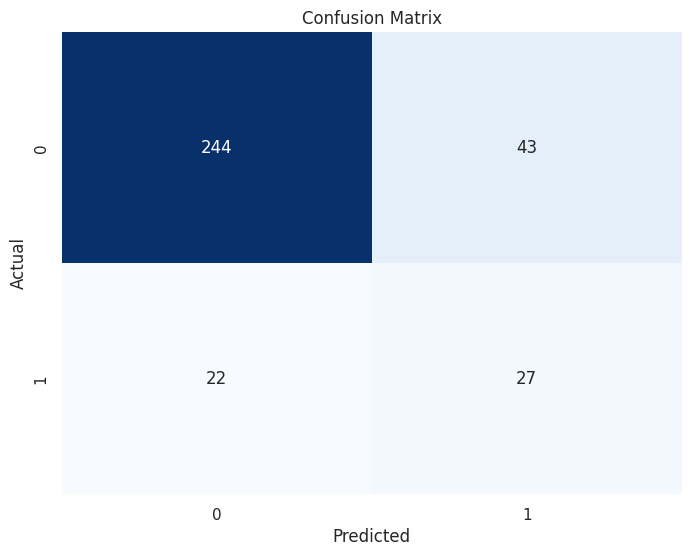

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(val_labels, binary_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

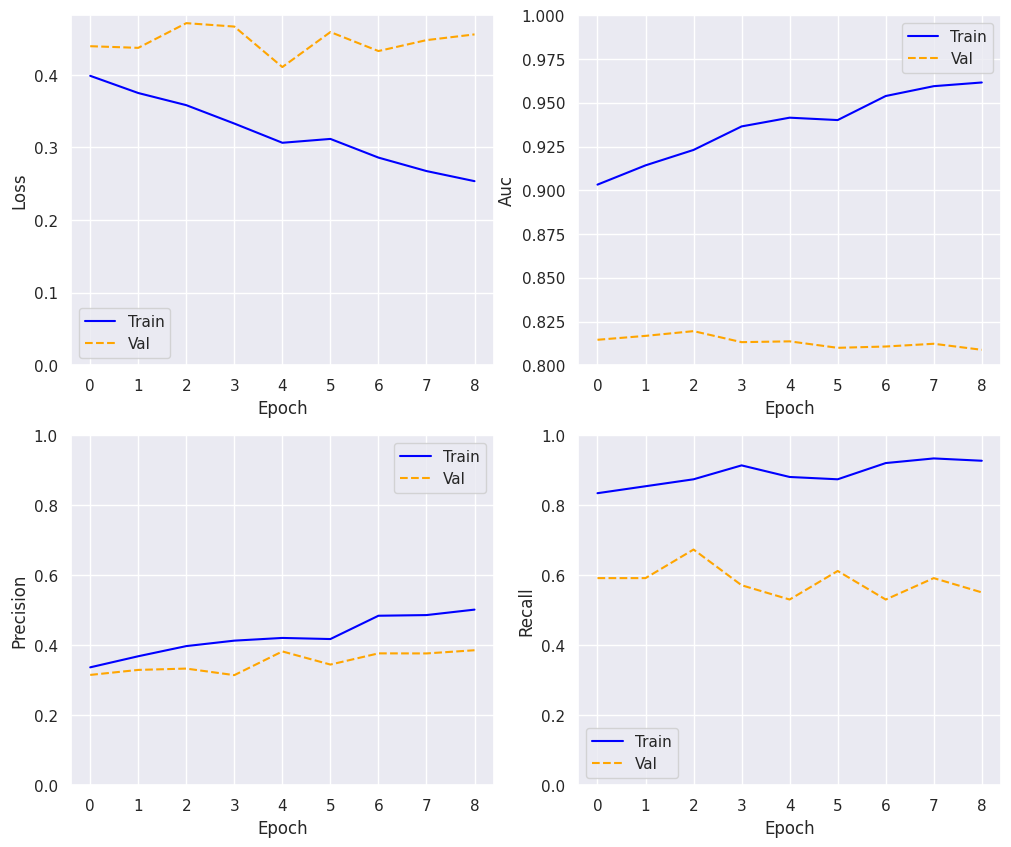

In [ ]:
def plot_metrics(history):
    # Define the list of metrics to plot
    metrics = ['loss', 'auc', 'precision', 'recall']

    # Define colors for the plots
    colors = ['blue', 'orange', 'green', 'red']

    # Loop through the list of metrics and create subplots for each
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()  # Format the metric name for display
        plt.subplot(2, 2, n+1)  # Create a subplot in a 2x2 grid

        # Plot the training metric using a solid line (color=colors[0])
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')

        # Plot the validation metric using a dashed line (color=colors[1])
        plt.plot(history.epoch, history.history['val_'+metric], color=colors[1], linestyle="--", label='Val')

        plt.xlabel('Epoch')  # Label the x-axis with 'Epoch'
        plt.ylabel(name)  # Label the y-axis with the metric name

        # Adjust the y-axis limits for specific metrics
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])  # Set the y-axis limits for loss
        elif metric == 'auc':
            plt.ylim([0.8, 1])  # Set the y-axis limits for AUC
        else:
            plt.ylim([0, 1])  # Set the y-axis limits for precision and recall

        plt.legend()  # Add a legend to the plot

# Call the function with your 'history' object to create the metric plots
plot_metrics(history)

### - Apply model to unlabled data

In [ ]:
# Create an empty dictionary to store input specifications
inputs = {}

# Iterate through the features in the training dataset
for name, column in train_features.items():
    # Determine the data type of the column
    dtype = column.dtype

    # If the data type is 'object', set it to 'tf.string'; otherwise, use 'tf.float32'
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    # Create an input layer for each feature with specified shape and data type
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

# Create a dictionary containing only the numeric input layers
numeric_inputs = {name: input for name, input in inputs.items() if input.dtype == tf.float32}

# Concatenate the numeric input layers into a single tensor
x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))

# Apply normalization to the concatenated numeric inputs
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_data[list(numeric_inputs.keys())]))
all_numeric_inputs = norm(x)

# Create a list to store preprocessed inputs starting with the normalized numeric inputs
preprocessed_inputs = [all_numeric_inputs]

# Iterate through the input layers again to process non-numeric (categorical) inputs
for name, input in inputs.items():
    # Skip numeric inputs
    if input.dtype == tf.float32:
        continue

    # Create a StringLookup layer to map unique values to indices
    lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(train_features[name]))

    # Create a CategoryEncoding layer to one-hot encode the indices
    one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    # Apply StringLookup and CategoryEncoding to the input
    x = lookup(input)
    x = one_hot(x)

    # Append the processed input to the list of preprocessed inputs
    preprocessed_inputs.append(x)

# Concatenate all preprocessed inputs into a single tensor
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

# Create a model for data preprocessing, taking raw inputs and producing preprocessed output
train_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

# Prepare test data for preprocessing
test_features_dict = {name: np.array(value) for name, value in test_features.items()}
features_dict = {name: values[:] for name, values in test_features_dict.items()}

# Apply the same preprocessing to the test data
test_preprocessed = train_preprocessing(features_dict)


In [ ]:
test_preprocessed

<tf.Tensor: shape=(1119, 63), dtype=float32, numpy=
array([[ 1.733, -2.003,  0.265, ...,  0.   ,  1.   ,  0.   ],
       [ 1.735,  1.054,  0.65 , ...,  0.   ,  0.   ,  1.   ],
       [ 1.737,  0.113, -1.971, ...,  0.   ,  0.   ,  1.   ],
       ...,
       [ 4.038,  0.701, -0.023, ...,  0.   ,  1.   ,  0.   ],
       [ 4.04 , -1.298,  1.539, ...,  0.   ,  1.   ,  0.   ],
       [ 4.042,  0.701,  0.911, ...,  0.   ,  1.   ,  0.   ]],
      dtype=float32)>

In [ ]:
y_pred = nn_model.predict(test_features_dict)


35/35 [==============================] - 0s 4ms/step


In [ ]:
#threshold for classification
y_pred_binary =[]
for pred in y_pred:
    if pred > 0.11:              # threshold is at .11 because of the class imbalance
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)

In [ ]:
sub = pd.DataFrame(y_pred_binary)
sub=pd.DataFrame(test_data['id'])
sub["Attrition"]= y_pred_binary
sub

,id,Attrition
0,1677,1
1,1678,1
2,1679,1
3,1680,1
4,1681,1
...,...,...
1114,2791,0
1115,2792,0
1116,2793,1
1117,2794,0


In [ ]:
sub.to_csv("predictions_1.csv",index=False)

## Conclusion

The validation precision of approximately 38.6% and validation recall of around 55.1% indicate that the model's performance might be less consistent when applied to unseen data. While the AUC value for the validation dataset is a respectable 80.9%, it is notably lower than the AUC for the training data, suggesting potential overfitting or issues with generalization.

Moreover, it's essential to consider the extensive correlation analysis conducted. We identified relatively strong negative correlations between attrition and several factors such as age, education, employment satisfaction, job level, monthly income, relationship satisfaction, stock option level, total working years, years at the company, years in the current role, years with the current manager, and job involvement. Conversely, there are small positive correlations with attributes like distance from home, the number of companies worked for, and performance rating.

Additonally some variables seem to be indirect mesures of other vairables, and the correlations suggest multicollinearity, which can affect the model's interpretability and performance. Notably, there are no features in this dataset that exhibit strong correlations with attrition. This suggests that attrition decisions are likely influenced by a combination of factors, rather than being driven by a single dominant factor within the firm.

In conclusion, while our model demonstrates promise, there is a clear need for further refinement and validation to enhance its real-world applicability. These results provide a solid foundation for potential use in various domains, but this project is hindered by the data quailty. There is not much information available about the data making interpretation challenging. Lastly the data set used here is synthesized so there is a need to aquire real world data to improve this project.